#  CAR PRICE DETECTION

### IMPORTING LIB and MODULES

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np
%matplotlib inline

In [6]:
from matplotlib import style

In [7]:
style.use('seaborn')
sns.set()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn import metrics

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
from sklearn.linear_model import Lasso

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
from xgboost import XGBRegressor

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
!pip install mlxtend 

In [24]:
from mlxtend.plotting import plot_decision_regions

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
import statsmodels.api as sm

In [28]:
import warnings

In [29]:
warnings.filterwarnings('ignore')

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
df=pd.read_csv('cars.csv')

In [34]:
df.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,425000,9680,Petrol,Mumbai,7,5
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000,119120,Diesel,Mumbai,11,9
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000,64593,Diesel,Thane,1,4
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000,25000,Diesel,Mumbai,2,4
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000,23800,Diesel,Mumbai,14,9


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1725 non-null   int64 
 1   year                     1725 non-null   int64 
 2   brand                    1725 non-null   object
 3   full_model_name          1725 non-null   object
 4   model_name               1725 non-null   object
 5   price                    1725 non-null   int64 
 6   distance_travelled(kms)  1725 non-null   int64 
 7   fuel_type                1725 non-null   object
 8   city                     1725 non-null   object
 9   brand_rank               1725 non-null   int64 
 10  car_age                  1725 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 148.4+ KB


In [36]:
df.describe()

,Id,year,price,distance_travelled(kms),brand_rank,car_age
count,1725.000000,1725.000000,1.725000e+03,1725.000000,1725.000000,1725.000000
mean,862.000000,2015.390725,1.494837e+06,53848.256232,15.731014,5.609275
std,498.108924,3.207504,1.671658e+06,44725.541963,12.951122,3.207504
min,0.000000,1990.000000,6.250000e+04,350.000000,1.000000,0.000000
25%,431.000000,2013.000000,5.450000e+05,29000.000000,5.000000,3.000000
50%,862.000000,2016.000000,8.750000e+05,49000.000000,14.000000,5.000000
75%,1293.000000,2018.000000,1.825000e+06,70500.000000,24.000000,8.000000
max,1724.000000,2021.000000,1.470000e+07,790000.000000,81.000000,31.000000


In [37]:
df.columns

Index(['Id', 'year', 'brand', 'full_model_name', 'model_name', 'price',
       'distance_travelled(kms)', 'fuel_type', 'city', 'brand_rank',
       'car_age'],
      dtype='object')

In [38]:
df.shape

(1725, 11)

In [39]:
df.columns.values
list(df.columns)

['Id',
 'year',
 'brand',
 'full_model_name',
 'model_name',
 'price',
 'distance_travelled(kms)',
 'fuel_type',
 'city',
 'brand_rank',
 'car_age']

In [40]:
df.info

<bound method DataFrame.info of         Id  year             brand  \
0        0  2016             Honda   
1        1  2012            Nissan   
2        2  2017            Toyota   
3        3  2017     Mercedes-Benz   
4        4  2012           Hyundai   
...    ...   ...               ...   
1720  1720  2015           Hyundai   
1721  1721  2011           Bentley   
1722  1722  2008  Mahindra-Renault   
1723  1723  1990          Mahindra   
1724  1724  2017           Hyundai   

                                        full_model_name   model_name    price  \
0                                       Honda Brio S MT         Brio   425000   
1                                Nissan Sunny XV Diesel        Sunny   325000   
2                Toyota Fortuner 2.8 4x2 MT [2016-2020]     Fortuner  2650000   
3     Mercedes-Benz E-Class E 220d Expression [2019-...      E-Class  4195000   
4                     Hyundai Verna Fluidic 1.6 CRDi SX        Verna   475000   
...                      

In [41]:
df.describe()

,Id,year,price,distance_travelled(kms),brand_rank,car_age
count,1725.000000,1725.000000,1.725000e+03,1725.000000,1725.000000,1725.000000
mean,862.000000,2015.390725,1.494837e+06,53848.256232,15.731014,5.609275
std,498.108924,3.207504,1.671658e+06,44725.541963,12.951122,3.207504
min,0.000000,1990.000000,6.250000e+04,350.000000,1.000000,0.000000
25%,431.000000,2013.000000,5.450000e+05,29000.000000,5.000000,3.000000
50%,862.000000,2016.000000,8.750000e+05,49000.000000,14.000000,5.000000
75%,1293.000000,2018.000000,1.825000e+06,70500.000000,24.000000,8.000000
max,1724.000000,2021.000000,1.470000e+07,790000.000000,81.000000,31.000000


In [42]:
df.select_dtypes(include=['float64','int64'])

,Id,year,price,distance_travelled(kms),brand_rank,car_age
0,0,2016,425000,9680,7,5
1,1,2012,325000,119120,11,9
2,2,2017,2650000,64593,1,4
3,3,2017,4195000,25000,2,4
4,4,2012,475000,23800,14,9
...,...,...,...,...,...,...
1720,1720,2015,290000,38000,14,6
1721,1721,2011,7500000,36000,44,10
1722,1722,2008,185000,142522,24,13
1723,1723,1990,325000,18581,24,31


In [43]:
df=df.drop_duplicates(keep='first')

In [44]:
df.isnull().sum()

Id                         0
year                       0
brand                      0
full_model_name            0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
brand_rank                 0
car_age                    0
dtype: int64

In [45]:
df.corr(method='pearson')

,Id,year,price,distance_travelled(kms),brand_rank,car_age
Id,1.000000,-0.054391,-0.105696,0.100282,0.022191,0.054391
year,-0.054391,1.000000,0.288483,-0.386107,0.134275,-1.000000
price,-0.105696,0.288483,1.000000,-0.137351,-0.164591,-0.288483
distance_travelled(kms),0.100282,-0.386107,-0.137351,1.000000,-0.111406,0.386107
brand_rank,0.022191,0.134275,-0.164591,-0.111406,1.000000,-0.134275
car_age,0.054391,-1.000000,-0.288483,0.386107,-0.134275,1.000000


In [46]:
df.corr(method='pearson')['distance_travelled(kms)']

Id                         0.100282
year                      -0.386107
price                     -0.137351
distance_travelled(kms)    1.000000
brand_rank                -0.111406
car_age                    0.386107
Name: distance_travelled(kms), dtype: float64

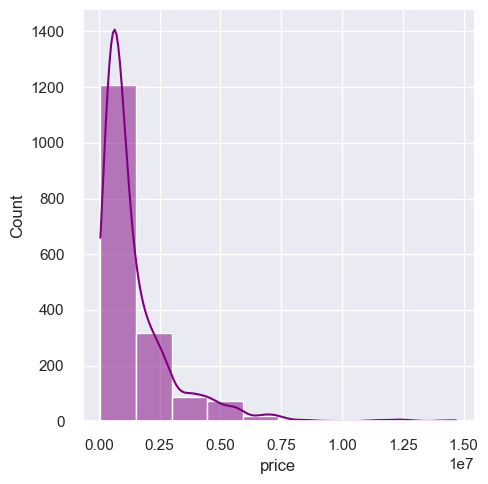

(<seaborn.axisgrid.FacetGrid at 0xcc7887ca30>, None)

In [47]:
sns.displot(data=df, x='price',bins=10,kde=True,color='purple'),plt.show()

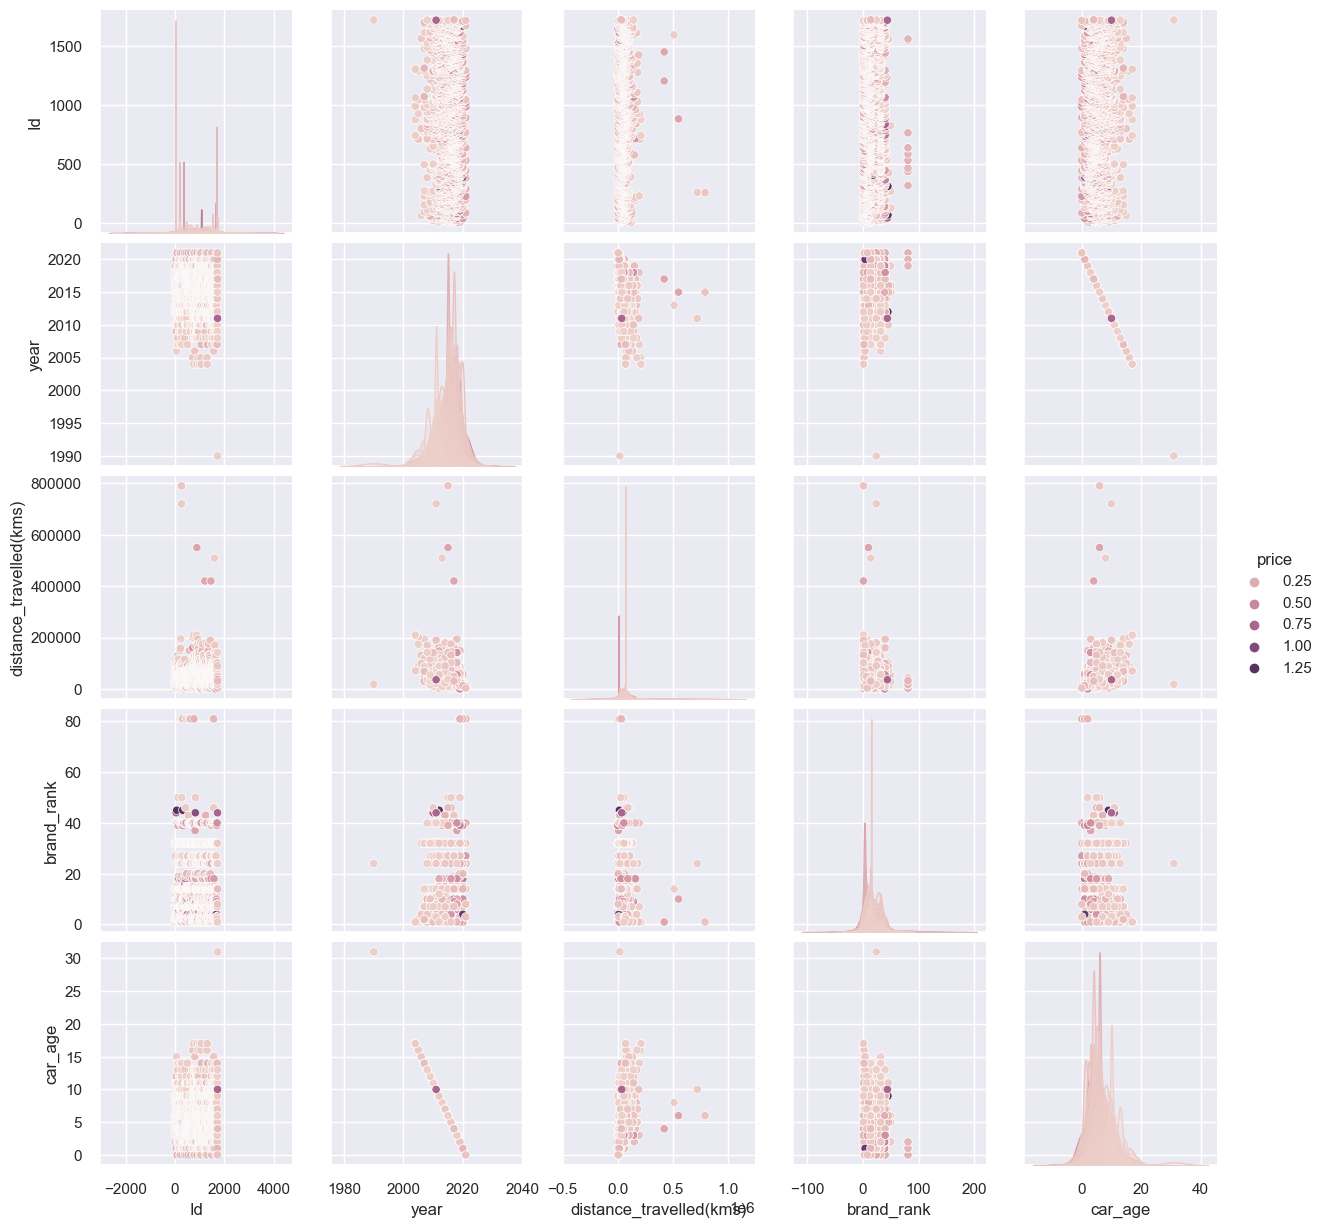

In [48]:
sns.pairplot(df, hue='price')
plt.show()

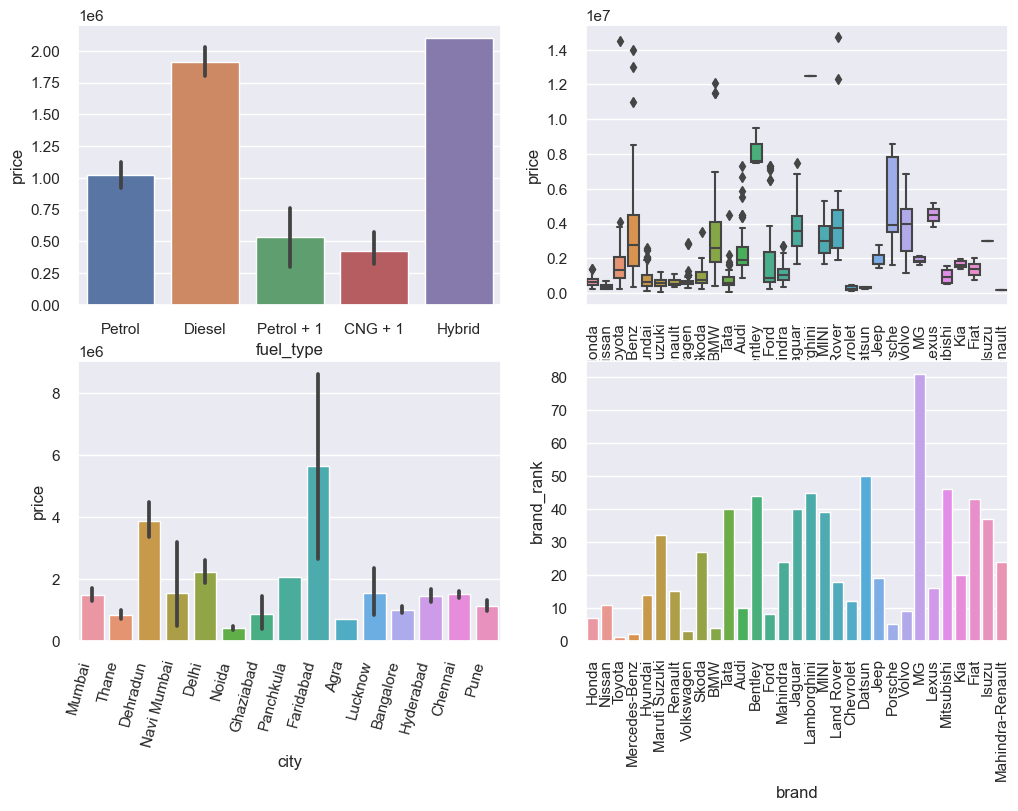

In [54]:
#fuel type v/s price 
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.barplot(x='fuel_type',y='price',data=df)
#brand v/s price 
plt.subplot(2,2,2)
box1=sns.boxplot(x='brand', y='price',data=df)
plt.xticks(rotation=90)
#city v/s price 
plt.subplot(2,2,3)
sns.barplot(x='city',y='price',data=df)
plt.xticks(rotation=75,ha='right')
#distance travelled v/s price 
plt.subplot(2,2,4)
sns.barplot(x='brand',y='brand_rank',data=df)
plt.xticks(rotation=90)
plt.show()

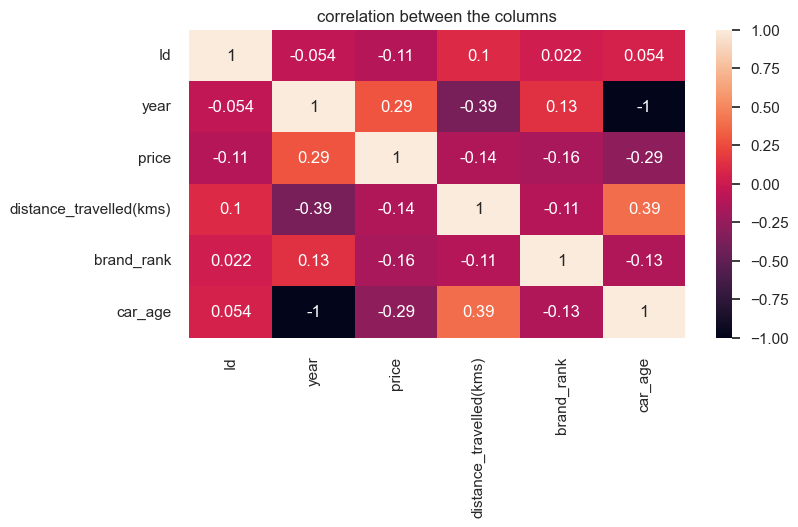

In [49]:
plt.figure(figsize=(8,4))
sns.heatmap (df.corr(),annot=True)
plt.title('correlation between the columns')
plt.show()

In [50]:
df.corr()['price'].sort_values()

car_age                   -0.288483
brand_rank                -0.164591
distance_travelled(kms)   -0.137351
Id                        -0.105696
year                       0.288483
price                      1.000000
Name: price, dtype: float64

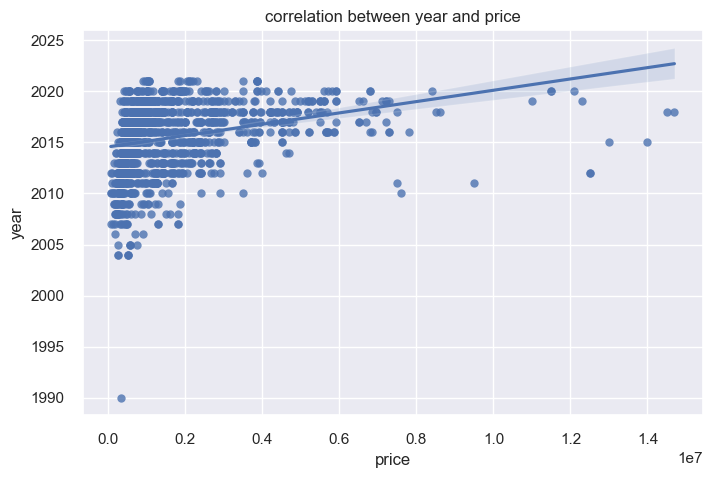

In [51]:
fig=plt.figure(figsize=(8,5))
plt.title('correlation between year and price')
sns.regplot(x='price',y='year',data=df)
plt.show()

In [52]:
df = df.rename(columns={'distance_travelled(kms)':'Mileage'}, index={'ONE': 'Row_1'})

In [53]:
df.drop(df.columns[[0,3]], axis=1, inplace=True)

In [54]:
df.head(1)

,year,brand,model_name,price,Mileage,fuel_type,city,brand_rank,car_age
0,2016,Honda,Brio,425000,9680,Petrol,Mumbai,7,5


#### label encoder 

In [55]:
brand_dic = dict()
model_name_dic = dict()
fuel_type_dic = dict()
city_dic = dict()

In [56]:
df['Car_Brand'] = le.fit_transform(df['brand'])
for num, lbl in enumerate(le.classes_):
 brand_dic[lbl]=num 
print('brand label saved')

df['Car_Model'] = le.fit_transform(df['model_name'])
for num, lbl in enumerate(le.classes_):
 model_name_dic[lbl]=num 
print('model_name label saved')

df['Fuel_type'] = le.fit_transform(df['fuel_type'])
for num, lbl in enumerate(le.classes_):
 fuel_type_dic[lbl]=num 
print('fuel_type label saved')

df['City'] = le.fit_transform(df['city'])
for num, lbl in enumerate(le.classes_):
 city_dic[lbl]=num 
print('city label saved')

df=df.drop(['brand','model_name','city','fuel_type'],axis=1)
df.head()

brand label saved
model_name label saved
fuel_type label saved
city label saved


,year,price,Mileage,brand_rank,car_age,Car_Brand,Car_Model,Fuel_type,City
0,2016,425000,9680,7,5,7,27,3,9
1,2012,325000,119120,11,9,23,128,1,9
2,2017,2650000,64593,1,4,28,68,1,14
3,2017,4195000,25000,2,4,21,50,1,9
4,2012,475000,23800,14,9,8,143,1,9


### Testing and Training Data

In [57]:
x=df.drop(['Car_Model','price'],axis=1)
y=df['price']
x.shape,y.shape

((1725, 7), (1725,))

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1207, 7), (1207,), (518, 7), (518,))

In [59]:
x_train

,year,Mileage,brand_rank,car_age,Car_Brand,Fuel_type,City
1176,2017,49000,32,4,20,3,2
584,2014,55000,7,7,7,3,1
1707,2018,27000,8,3,6,1,13
611,2015,63900,14,6,8,3,1
706,2008,60000,32,13,20,3,1
...,...,...,...,...,...,...,...
1130,2011,120000,1,10,28,1,2
1294,2016,57000,14,5,8,3,2
860,2008,75000,32,13,20,3,7
1459,2018,15600,2,3,21,1,2


In [60]:
y_train

1176     785000
584      625000
1707    3000000
611      489000
706      340000
         ...   
1130     870000
1294     630000
860      250000
1459    3200000
1126    2650000
Name: price, Length: 1207, dtype: int64

In [61]:
x_test

,year,Mileage,brand_rank,car_age,Car_Brand,Fuel_type,City
339,2014,40000,14,7,8,3,11
598,2014,37411,1,7,28,3,1
300,2017,28000,7,4,7,3,4
1510,2018,16900,40,3,27,1,13
433,2019,53500,24,2,18,1,8
...,...,...,...,...,...,...,...
490,2010,72000,32,11,20,3,6
1274,2015,54000,3,6,29,1,2
287,2016,51000,27,5,26,3,4
700,2018,43000,10,3,0,1,1


In [62]:
y_test

339      365000
598     1195000
300      575000
1510     900000
433     1675000
         ...   
490      225000
1274     620000
287     1650000
700     2775000
1711     999000
Name: price, Length: 518, dtype: int64

In [63]:
train_test_split(y, shuffle=False)

[0        425000
 1        325000
 2       2650000
 3       4195000
 4        475000
          ...   
 1288     530000
 1289    2400000
 1290     550000
 1291    1250000
 1292     475000
 Name: price, Length: 1293, dtype: int64,
 1293    1050000
 1294     630000
 1295    2200000
 1296    2850000
 1297     600000
          ...   
 1720     290000
 1721    7500000
 1722     185000
 1723     325000
 1724    1395000
 Name: price, Length: 432, dtype: int64]

In [64]:
scaler=StandardScaler()

In [65]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Training and Testing of model 

In [66]:
lr =LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [67]:
rf =RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [68]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [69]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [70]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [181]:
lr_pred=lr.predict(x_test)
rf_pred=rf.predict(x_test)
gbr_pred=gbr.predict(x_test)
dt_pred=dt.predict(x_test)
xgb_pred = xgb.predict(x_test)

### R2 Score 

In [72]:
lr_score = metrics.r2_score(y_test,lr_pred)
rf_score = metrics.r2_score(y_test,rf_pred)
gbr_score = metrics.r2_score(y_test,gbr_pred)
dt_score = metrics.r2_score(y_test,dt_pred)
xgb_score = metrics.r2_score(y_test,xgb_pred)

In [73]:
print(lr_score,rf_score,gbr_score,dt_score,xgb_score)

0.18703834644940265 0.6726549296097257 0.6103389319226453 0.5344374699264501 0.6684335280009103


In [74]:
final_data=pd.DataFrame({'Models':['Linear Regression','RandomForest Regressor',
                                   'GradientBoosting Regressor','DecisionTree Regressor','XGB Regressor'],
                  'R2_score':[lr_score,rf_score,gbr_score,dt_score,xgb_score]})
final_data

,Models,R2_score
0,Linear Regression,0.187038
1,RandomForest Regressor,0.672655
2,GradientBoosting Regressor,0.610339
3,DecisionTree Regressor,0.534437
4,XGB Regressor,0.668434


### Mean absolute error

In [75]:
lr_mae=mean_absolute_error(y_test, lr_pred)
dt_mae=mean_absolute_error(y_test, dt_pred)
xgb_mae=mean_absolute_error(y_test, xgb_pred)
rf_mae=mean_absolute_error(y_test, rf_pred)
gbr_mae=mean_absolute_error(y_test, gbr_pred)

In [76]:
print(lr_mae,rf_mae,gbr_mae,dt_mae,xgb_mae)

920529.8273915767 425759.5086412944 527552.1908298882 432042.47104247106 427783.5606449083


In [77]:
final_data1=pd.DataFrame({'Models':['Linear Regression','RandomForest Regressor',
                                   'GradientBoosting Regressor','DecisionTree Regressor','XGB Regressor'],
                  'MAE':[lr_mae,rf_mae,gbr_mae,dt_mae,xgb_mae]})
final_data1

,Models,MAE
0,Linear Regression,920529.827392
1,RandomForest Regressor,425759.508641
2,GradientBoosting Regressor,527552.190830
3,DecisionTree Regressor,432042.471042
4,XGB Regressor,427783.560645


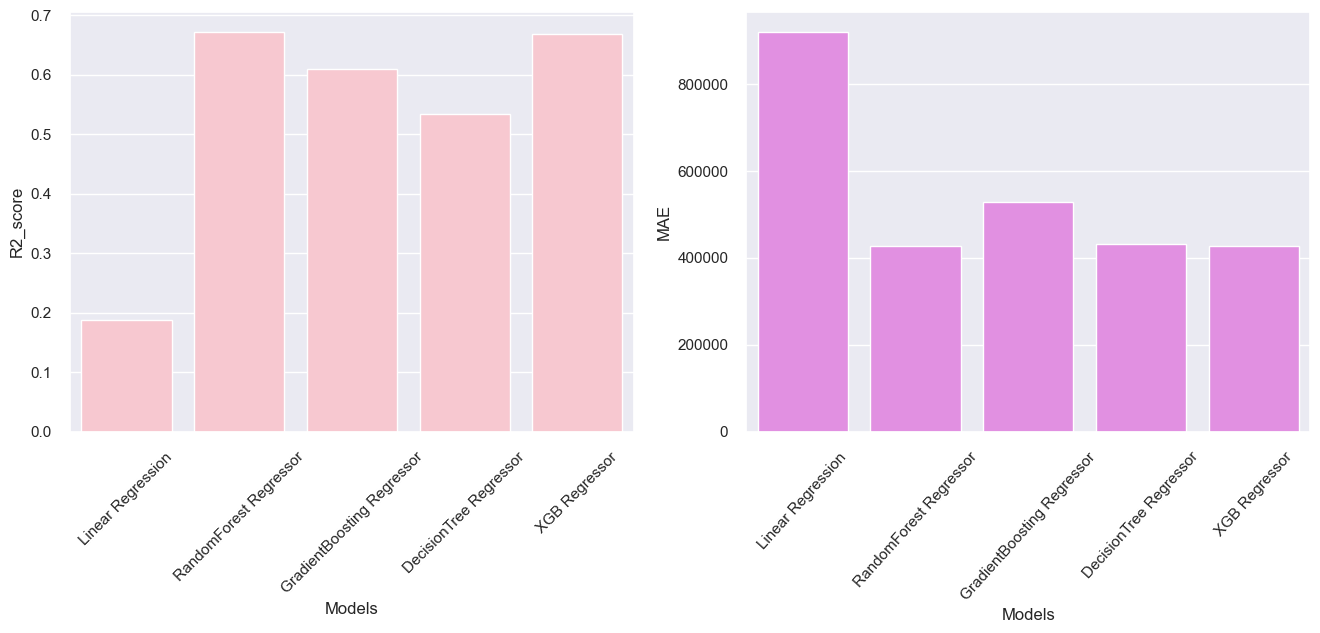

In [78]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.barplot(final_data['Models'],final_data['R2_score'],color='pink')
plt.xticks(rotation=45)
plt.subplot(2,2,2)
sns.barplot(final_data1['Models'],final_data1['MAE'],color='violet')
plt.xticks(rotation=48)
plt.show()

In [79]:
lr_train=lr.predict(x_train) 
rf_train=rf.predict(x_train) 
xgb_train=xgb.predict(x_train)
gbr_train=gbr.predict(x_train)
dt_train=dt.predict(x_train)

###  Linear Regression Model

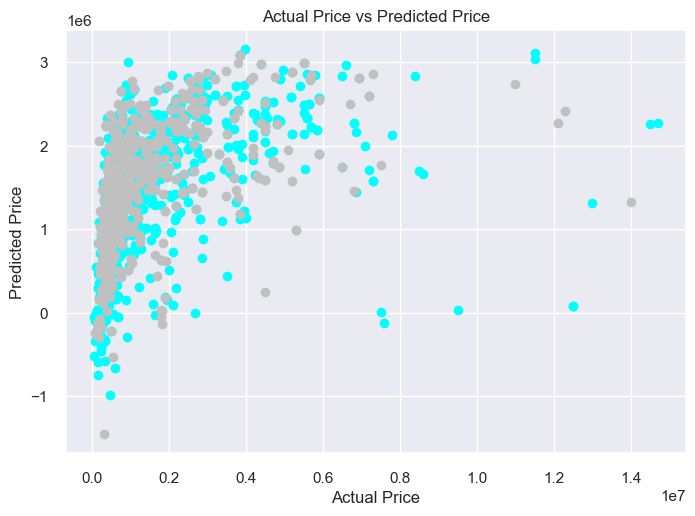

In [80]:
plt.scatter(y_train,lr_train,color='cyan')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.scatter(y_test,lr_pred,color='silver')
plt.show()

### XGBoost model 

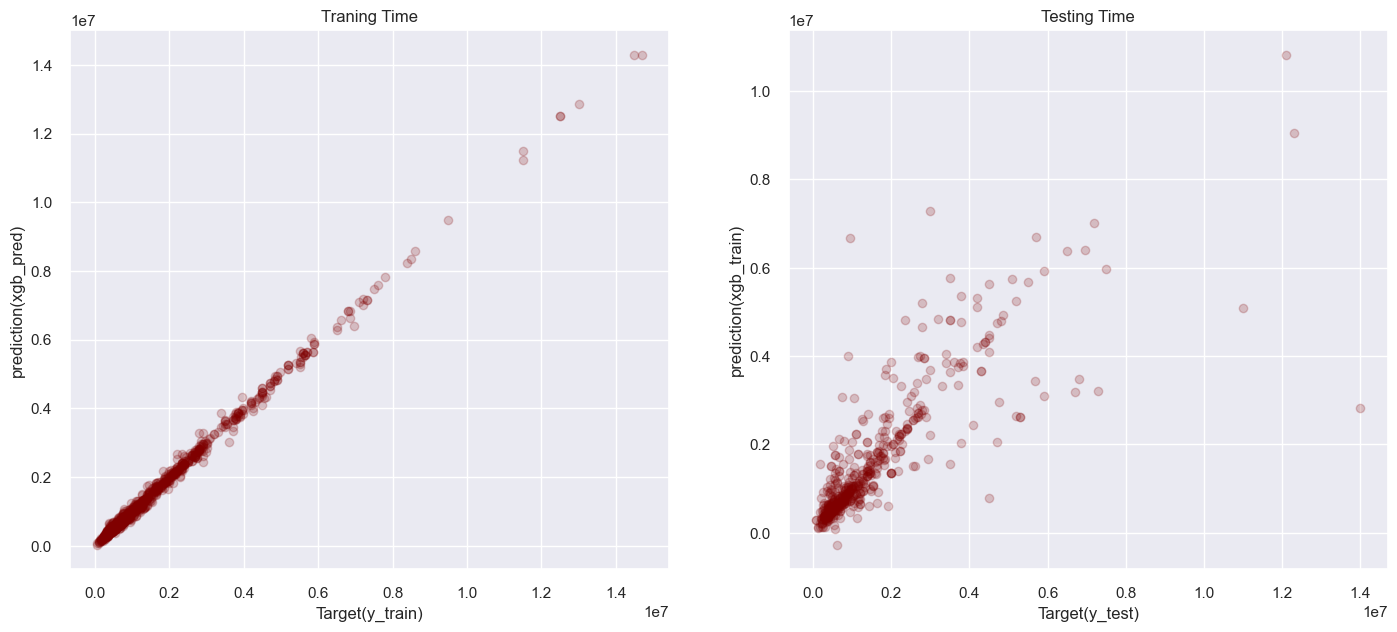

In [81]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.scatter(y_train,xgb_train,color='maroon',alpha=0.2);
plt.xlabel('Target(y_train)');
plt.ylabel('prediction(xgb_pred)');
plt.title('Traning Time');

plt.subplot(1,2,2)
plt.scatter(y_test,xgb_pred,color='maroon',alpha=0.2);
plt.xlabel('Target(y_test)');
plt.ylabel('prediction(xgb_train)');
plt.title('Testing Time');
plt.show()

### Randomforest Model 

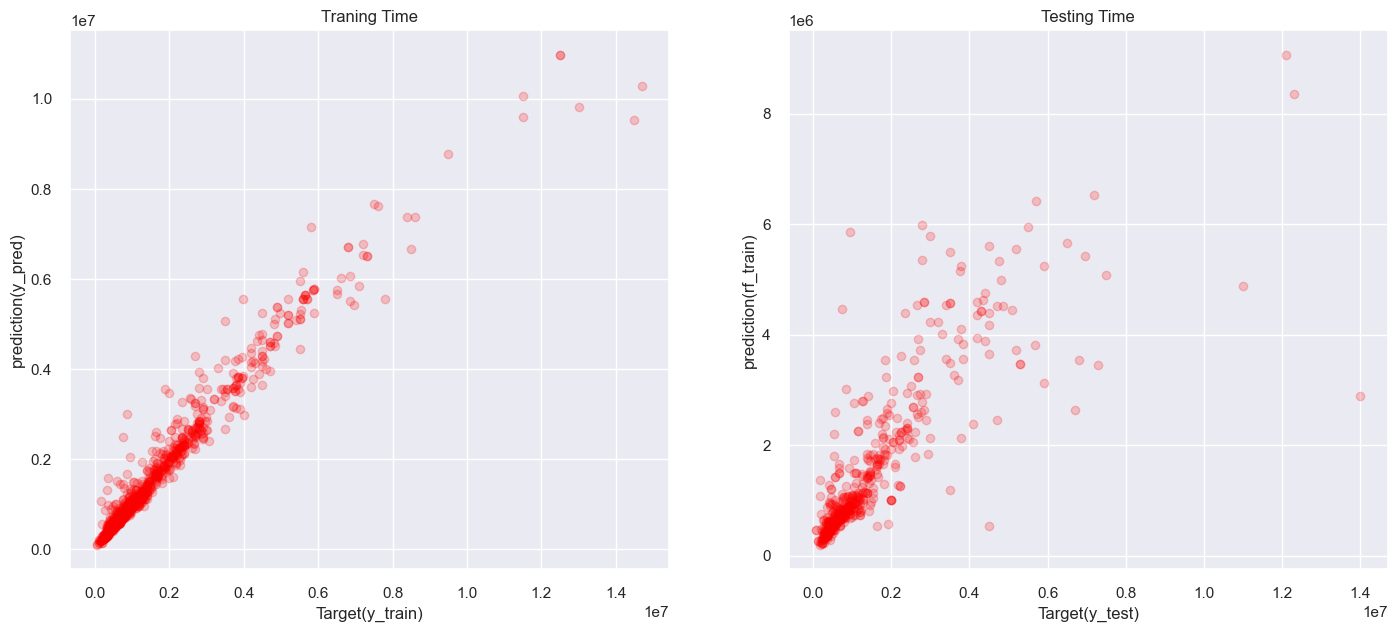

In [82]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.scatter(y_train,rf_train,color='red',alpha=0.2);
plt.xlabel('Target(y_train)');
plt.ylabel('prediction(y_pred)');
plt.title('Traning Time');

plt.subplot(1,2,2)
plt.scatter(y_test,rf_pred,color='red',alpha=0.2);
plt.xlabel('Target(y_test)');
plt.ylabel('prediction(rf_train)');
plt.title('Testing Time');
plt.show()

### Gradient Boosting Regressor  

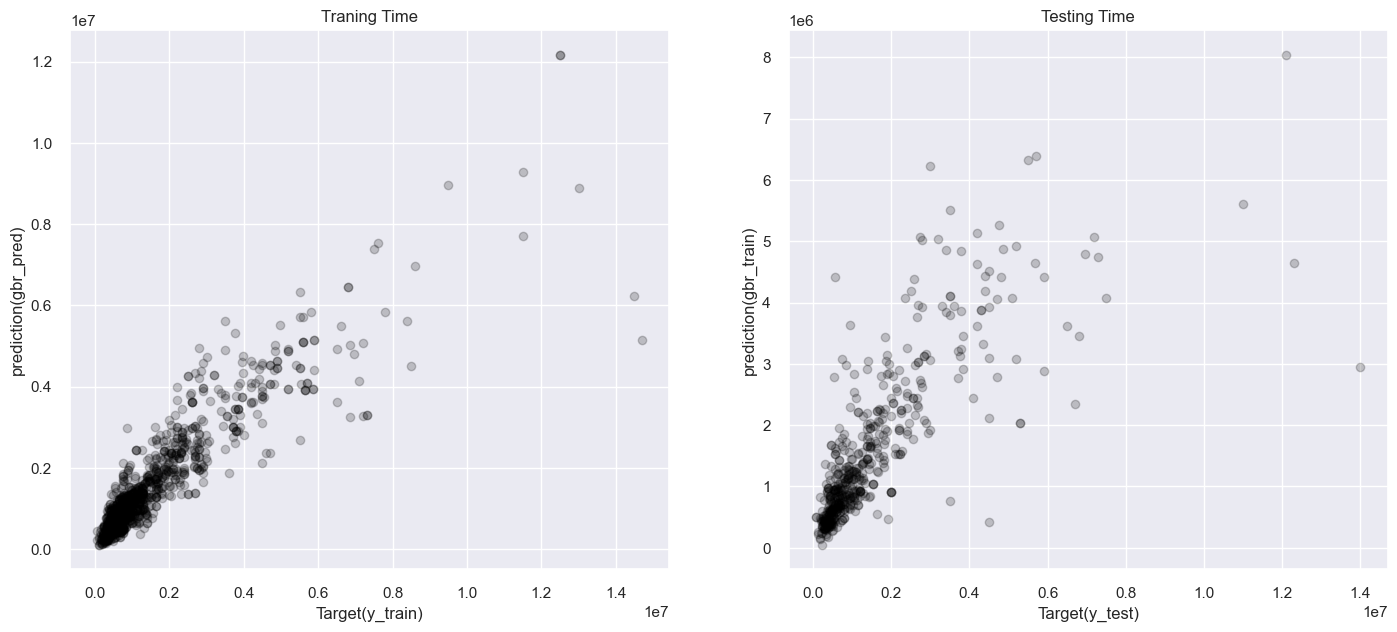

In [83]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.scatter(y_train,gbr_train,color='black',alpha=0.2);
plt.xlabel('Target(y_train)');
plt.ylabel('prediction(gbr_pred)');
plt.title('Traning Time');

plt.subplot(1,2,2)
plt.scatter(y_test,gbr_pred,color='black',alpha=0.2);
plt.xlabel('Target(y_test)');
plt.ylabel('prediction(gbr_train)');
plt.title('Testing Time');
plt.show()

### Decession Tree Regressor

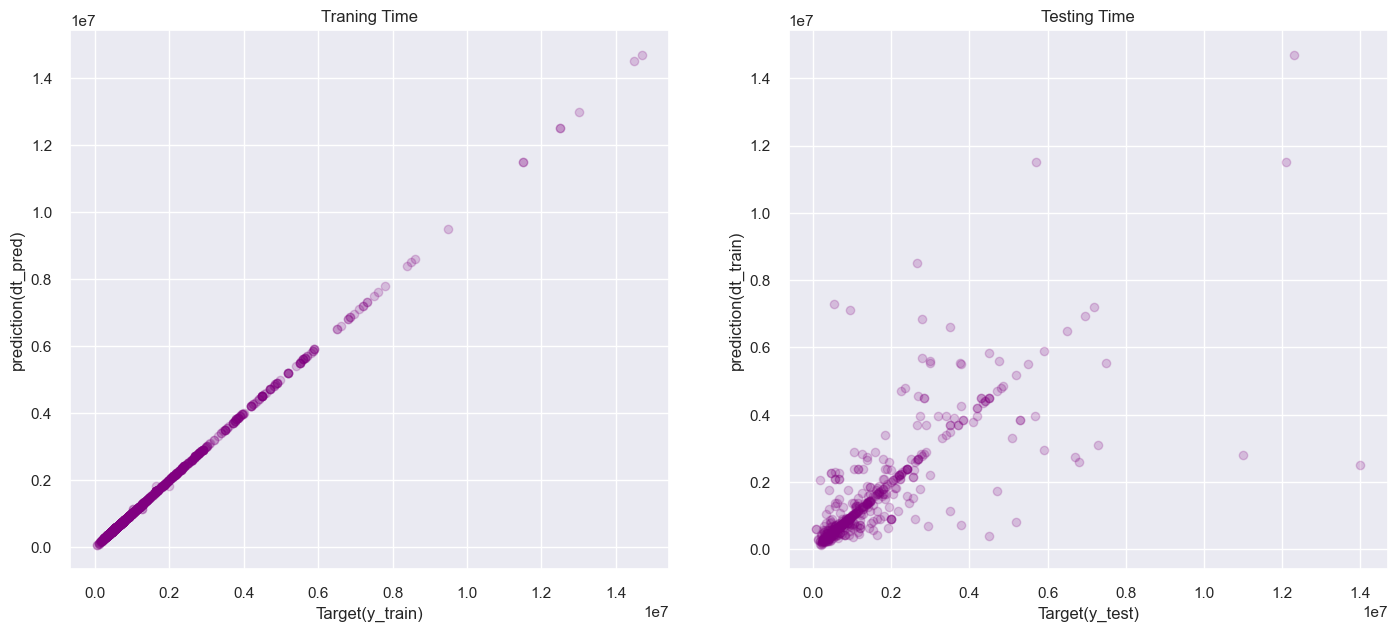

In [84]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.scatter(y_train,dt_train,color='purple',alpha=0.2);
plt.xlabel('Target(y_train)');
plt.ylabel('prediction(dt_pred)');
plt.title('Traning Time');

plt.subplot(1,2,2)
plt.scatter(y_test,dt_pred,color='purple',alpha=0.2);
plt.xlabel('Target(y_test)');
plt.ylabel('prediction(dt_train)');
plt.title('Testing Time');
plt.show()

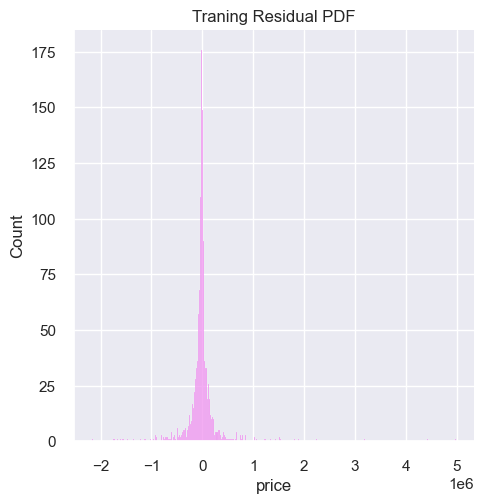

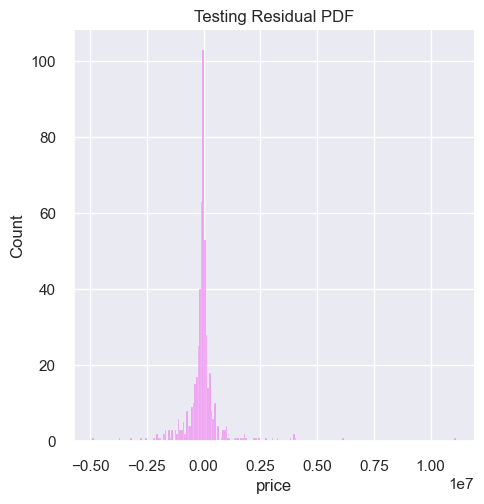

In [85]:
residual_train=(y_train - rf.predict(x_train));
residual_test=(y_test - rf.predict(x_test));
sns.displot (residual_train,color='violet');
plt.title('Traning Residual PDF');

plt.show()
sns.displot (residual_test,color='violet');
plt.title('Testing Residual PDF');
plt.show()

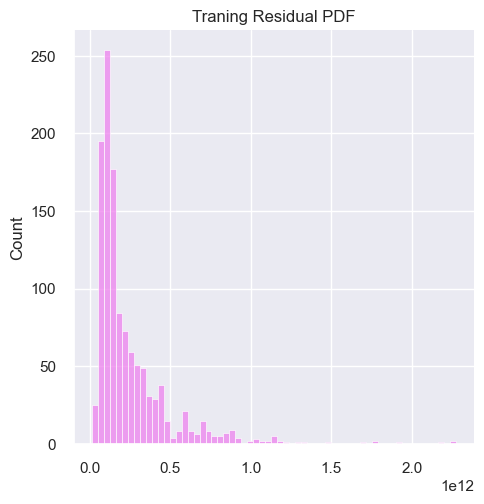

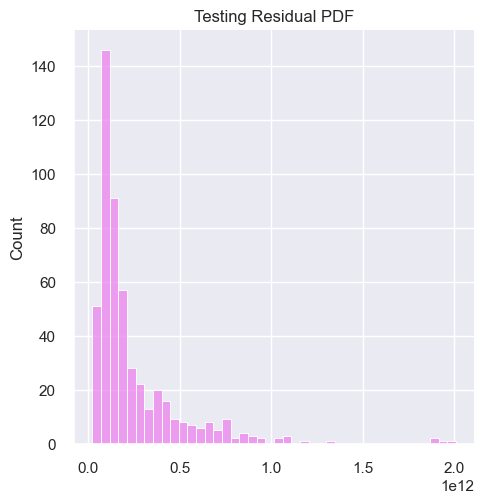

In [182]:
residual_train=(y_train - lr.predict(x_train));
residual_test=(y_test - lr.predict(x_test));
sns.displot (residual_train,color='violet');
plt.title('Traning Residual PDF');

plt.show()
sns.displot (residual_test,color='violet');
plt.title('Testing Residual PDF');
plt.show()

### Evaluation of Model 

In [86]:
df_rf_eval=pd.DataFrame(rf.predict(x_test),columns=['Prediction'])
y_test=y_test.reset_index(drop=True)
df_rf_eval['Target']=y_test
df_rf_eval['Residual']=df_rf_eval['Target']-df_rf_eval['Prediction']
df_rf_eval['Differences%']=np.absolute(df_rf_eval['Residual']/df_rf_eval['Target']*100)
df_rf_eval

,Prediction,Target,Residual,Differences%
0,406800.0,365000,-41800.0,11.452055
1,732550.0,1195000,462450.0,38.698745
2,775320.0,575000,-200320.0,34.838261
3,1085720.0,900000,-185720.0,20.635556
4,1422100.0,1675000,252900.0,15.098507
...,...,...,...,...
513,276775.0,225000,-51775.0,23.011111
514,650750.0,620000,-30750.0,4.959677
515,543530.0,1650000,1106470.0,67.058788
516,2606350.0,2775000,168650.0,6.077477


In [87]:
df_rf_eval.describe()

,Prediction,Target,Residual,Differences%
count,5.180000e+02,5.180000e+02,5.180000e+02,518.000000
mean,1.540469e+06,1.509720e+06,-3.074864e+04,34.626170
std,1.400820e+06,1.658109e+06,9.481721e+05,66.218426
min,1.998550e+05,8.000000e+04,-4.898950e+06,0.000000
25%,6.209950e+05,5.325000e+05,-2.056162e+05,5.838181
50%,9.437750e+05,9.325000e+05,-2.567500e+04,15.666466
75%,2.050175e+06,1.850000e+06,8.611250e+04,36.407138
max,9.067000e+06,1.400000e+07,1.111126e+07,603.856410


In [88]:
df_lr_eval=pd.DataFrame(lr.predict(x_test),columns=['Prediction'])
y_test=y_test.reset_index(drop=True)
df_lr_eval['Target']=y_test
df_lr_eval['Residual']=df_lr_eval['Target']-df_lr_eval['Prediction']
df_lr_eval['Differences%']=np.absolute(df_lr_eval['Residual']/df_lr_eval['Target']*100)
df_lr_eval

,Prediction,Target,Residual,Differences%
0,1.028196e+06,365000,-6.631964e+05,181.697640
1,1.128329e+06,1195000,6.667085e+04,5.579151
2,1.687323e+06,575000,-1.112323e+06,193.447436
3,1.460974e+06,900000,-5.609736e+05,62.330395
4,2.054714e+06,1675000,-3.797139e+05,22.669489
...,...,...,...,...
513,-1.587865e+05,225000,3.837865e+05,170.571757
514,1.958675e+06,620000,-1.338675e+06,215.915390
515,6.926468e+05,1650000,9.573532e+05,58.021407
516,2.661003e+06,2775000,1.139967e+05,4.107990


In [89]:
df_lr_eval.describe()

,Prediction,Target,Residual,Differences%
count,5.180000e+02,5.180000e+02,5.180000e+02,518.000000
mean,1.544641e+06,1.509720e+06,-3.492053e+04,95.348837
std,7.203109e+05,1.658109e+06,1.494615e+06,100.497267
min,-1.455663e+06,8.000000e+04,-1.908634e+06,0.193208
25%,1.051102e+06,5.325000e+05,-8.191204e+05,26.844286
50%,1.608460e+06,9.325000e+05,-3.685943e+05,64.821418
75%,2.060046e+06,1.850000e+06,1.385570e+05,128.633949
max,3.085336e+06,1.400000e+07,1.266962e+07,954.492987


In [90]:
df_xgb_eval=pd.DataFrame(xgb.predict(x_test),columns=['Prediction'])
y_test=y_test.reset_index(drop=True)
df_xgb_eval['Target']=y_test
df_xgb_eval['Residual']=df_xgb_eval['Target']-df_xgb_eval['Prediction']
df_xgb_eval['Differences%']=np.absolute(df_xgb_eval['Residual']/df_xgb_eval['Target']*100)
df_xgb_eval

,Prediction,Target,Residual,Differences%
0,3.858033e+05,365000,-20803.312500,5.699538
1,6.485549e+05,1195000,546445.125000,45.727626
2,9.200683e+05,575000,-345068.312500,60.011880
3,1.074349e+06,900000,-174349.250000,19.372139
4,9.235142e+05,1675000,751485.812500,44.864825
...,...,...,...,...
513,1.310955e+05,225000,93904.484375,41.735326
514,6.724341e+05,620000,-52434.062500,8.457107
515,6.802178e+05,1650000,969782.187500,58.774678
516,2.689456e+06,2775000,85543.750000,3.082658


In [91]:
df_xgb_eval.describe()

,Prediction,Target,Residual,Differences%
count,5.180000e+02,5.180000e+02,5.180000e+02,518.000000
mean,1.546506e+06,1.509720e+06,-3.678593e+04,35.713953
std,1.458918e+06,1.658109e+06,9.540586e+05,61.782505
min,-2.684141e+05,8.000000e+04,-5.732172e+06,0.027062
25%,6.035373e+05,5.325000e+05,-1.884838e+05,5.065836
50%,9.818470e+05,9.325000e+05,-1.325430e+04,16.998145
75%,2.015300e+06,1.850000e+06,8.827258e+04,39.445409
max,1.082768e+07,1.400000e+07,1.116926e+07,701.616282


In [92]:
df_gbr_eval=pd.DataFrame(gbr.predict(x_test),columns=['Prediction'])
y_test=y_test.reset_index(drop=True)
df_gbr_eval['Target']=y_test
df_gbr_eval['Residual']=df_gbr_eval['Target']-df_gbr_eval['Prediction']
df_gbr_eval['Differences%']=np.absolute(df_gbr_eval['Residual']/df_gbr_eval['Target']*100)
df_gbr_eval

,Prediction,Target,Residual,Differences%
0,3.929123e+05,365000,-2.791226e+04,7.647194
1,9.264052e+05,1195000,2.685948e+05,22.476555
2,9.089084e+05,575000,-3.339084e+05,58.071027
3,1.181502e+06,900000,-2.815021e+05,31.278011
4,1.230884e+06,1675000,4.441157e+05,26.514371
...,...,...,...,...
513,2.432224e+05,225000,-1.822241e+04,8.098849
514,1.010520e+06,620000,-3.905200e+05,62.987095
515,5.443520e+05,1650000,1.105648e+06,67.008971
516,2.679965e+06,2775000,9.503520e+04,3.424692


In [93]:
df_gbr_eval.describe()

,Prediction,Target,Residual,Differences%
count,5.180000e+02,5.180000e+02,5.180000e+02,518.000000
mean,1.544893e+06,1.509720e+06,-3.517255e+04,44.957822
std,1.268243e+06,1.658109e+06,1.034440e+06,65.476334
min,5.150410e+04,8.000000e+04,-3.859004e+06,0.029288
25%,6.518902e+05,5.325000e+05,-3.769048e+05,12.181106
50%,1.076865e+06,9.325000e+05,-9.963566e+04,26.183402
75%,2.039996e+06,1.850000e+06,1.329148e+05,50.463178
max,8.043835e+06,1.400000e+07,1.105773e+07,689.107816


In [94]:
df_dt_eval=pd.DataFrame(dt.predict(x_test),columns=['Prediction'])
y_test=y_test.reset_index(drop=True)
df_dt_eval['Target']=y_test
df_dt_eval['Residual']=df_dt_eval['Target']-df_dt_eval['Prediction']
df_dt_eval['Differences%']=np.absolute(df_dt_eval['Residual']/df_dt_eval['Target']*100)
df_dt_eval

,Prediction,Target,Residual,Differences%
0,385000.0,365000,-20000.0,5.479452
1,725000.0,1195000,470000.0,39.330544
2,585000.0,575000,-10000.0,1.739130
3,1775000.0,900000,-875000.0,97.222222
4,1500000.0,1675000,175000.0,10.447761
...,...,...,...,...
513,285000.0,225000,-60000.0,26.666667
514,620000.0,620000,0.0,0.000000
515,435000.0,1650000,1215000.0,73.636364
516,2850000.0,2775000,-75000.0,2.702703


In [95]:
df_dt_eval.describe()

,Prediction,Target,Residual,Differences%
count,5.180000e+02,5.180000e+02,5.180000e+02,518.000000
mean,1.537459e+06,1.509720e+06,-2.773938e+04,34.926104
std,1.656018e+06,1.658109e+06,1.131022e+06,94.913682
min,1.450000e+05,8.000000e+04,-6.750000e+06,0.000000
25%,5.412500e+05,5.325000e+05,-7.000000e+04,0.000000
50%,9.050000e+05,9.325000e+05,0.000000e+00,8.257576
75%,1.900000e+06,1.850000e+06,5.000000e+04,33.843750
max,1.470000e+07,1.400000e+07,1.150000e+07,1227.272727


### Randomised Search CV

In [96]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [97]:
rf_random=RandomForestRegressor()
random_grid={'bootstrap':[True,False],
            'max_depth':[10,20,30,40,50,None],
            'max_features':['auto','sqrt'],
            'min_samples_leaf':[1,2,4],
            'min_samples_split':[2,5,7],
            'n_estimators':[100,200]}
rf_random=RandomizedSearchCV(estimator=rf_random,
                            param_distributions=random_grid,
                            n_iter=100,
                            cv=3,
                            verbose=8,
                            n_jobs=-1)
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200]},
                   verbose=8)

In [98]:
rf_random.best_estimator_,rf_random.best_params_,rf_random.best_score_

(RandomForestRegressor(min_samples_leaf=2),
 {'n_estimators': 100,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_features': 'auto',
  'max_depth': None,
  'bootstrap': True},
 0.655065929597087)

In [99]:
np.sqrt(mean_squared_error(y_train,rf_random.predict(x_train)))

561192.3773884715

In [100]:
np.sqrt(mean_squared_error(y_test,rf_random.predict(x_test)))

972657.6439190527

### Grid Search CV

In [101]:
rf_grid_model=RandomForestRegressor()

param_grid={'bootstrap':[False],
            'max_depth':[25,30,35],
            'max_features':['sqrt'],
            'min_samples_leaf':[1,2],
            'min_samples_split':[1,2,3],
            'n_estimators':[100,150,200]}
rf_grid=GridSearchCV(estimator=rf_grid_model,
                            param_grid=param_grid,
                            cv=3,
                            verbose=8,
                            n_jobs=-1)
rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [102]:
rf_grid.best_estimator_,rf_grid.best_params_,rf_grid.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=25, max_features='sqrt',
                       min_samples_split=3, n_estimators=200),
 {'bootstrap': False,
  'max_depth': 25,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 200},
 0.6588507783000558)

In [103]:
np.sqrt(mean_squared_error(y_train,rf_grid.predict(x_train)))

178826.68363243522

In [104]:
np.sqrt(mean_squared_error(y_test,rf_grid.predict(x_test)))

1004965.7437764298

In [105]:
rf_grid_model_2=RandomForestRegressor()

param_grid_2={'bootstrap':[False],
            'max_depth':[28,30,32],
            'max_features':['sqrt'],
            'min_samples_leaf':[1],
            'min_samples_split':[2,3,4],
            'n_estimators':[50,80,100]}
rf_grid_2=GridSearchCV(estimator=rf_grid_model_2,
                            param_grid=param_grid_2,
                            cv=3,
                            verbose=8,
                            n_jobs=-1)
rf_grid_2.fit(x_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [28, 30, 32],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             verbose=8)

In [106]:
rf_grid_2.best_estimator_,rf_grid_2.best_params_,rf_grid_2.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=28, max_features='sqrt',
                       min_samples_split=3),
 {'bootstrap': False,
  'max_depth': 28,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 100},
 0.6680159468605091)

In [107]:
np.sqrt(mean_squared_error(y_train,rf_grid_2.predict(x_train)))

178464.3594316954

In [108]:
np.sqrt(mean_squared_error(y_test,rf_grid_2.predict(x_test)))

998084.4240017987

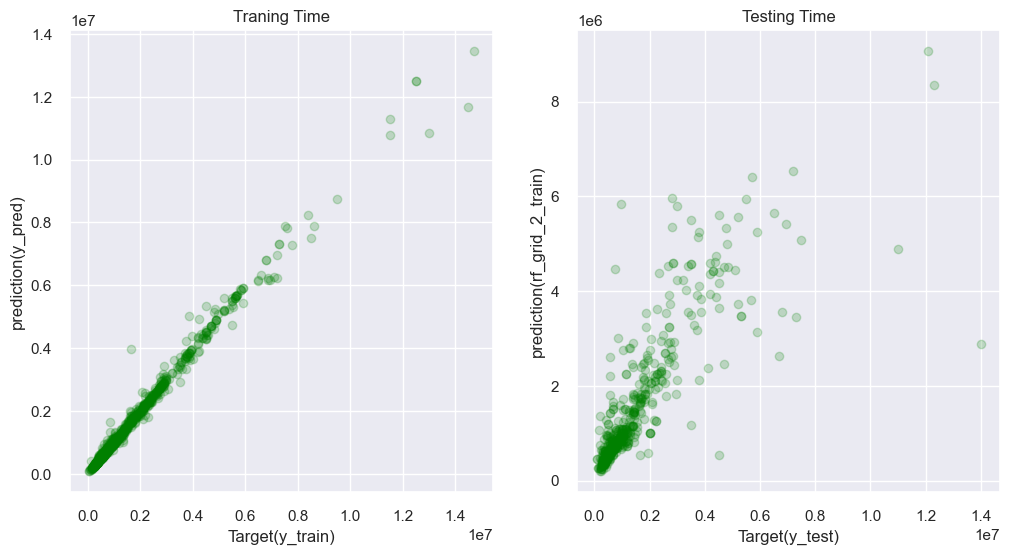

In [109]:
plt.figure(figsize=(12,6))
rf_grid_2_train=rf_grid_2.predict(x_train)
plt.subplot(1,2,1)
plt.scatter(y_train,rf_grid_2_train,color='green',alpha=0.2);
plt.xlabel('Target(y_train)');
plt.ylabel('prediction(y_pred)');
plt.title('Traning Time');
plt.subplot(1,2,2)
plt.scatter(y_test,rf_pred,color='green',alpha=0.2);
plt.xlabel('Target(y_test)');
plt.ylabel('prediction(rf_grid_2_train)');
plt.title('Testing Time');
plt.show()

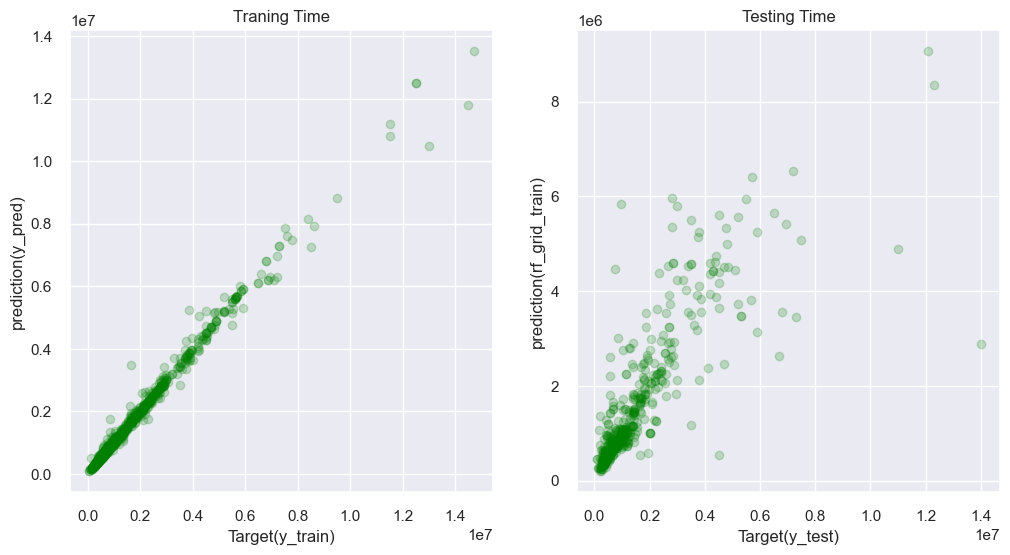

In [110]:
plt.figure(figsize=(12,6))
rf_grid_train=rf_grid.predict(x_train)
plt.subplot(1,2,1)
plt.scatter(y_train,rf_grid_train,color='green',alpha=0.2);
plt.xlabel('Target(y_train)');
plt.ylabel('prediction(y_pred)');
plt.title('Traning Time');
plt.subplot(1,2,2)
plt.scatter(y_test,rf_pred,color='green',alpha=0.2);
plt.xlabel('Target(y_test)');
plt.ylabel('prediction(rf_grid_train)');
plt.title('Testing Time');
plt.show()

In [111]:
scaler.fit(df.drop('price',axis=1))

StandardScaler()

In [112]:
scaled_features=scaler.transform(df.drop('price',axis=1))

In [113]:
df1=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df1.head()

,year,price,Mileage,brand_rank,car_age,Car_Brand,Car_Model,Fuel_type
0,0.190008,-0.987826,-0.674347,-0.190008,-0.835092,-1.119474,1.070742,0.801003
1,-1.057429,1.459807,-0.365404,1.057429,0.904815,0.947004,-0.912113,0.801003
2,0.501868,0.240307,-1.137761,-0.501868,1.448536,-0.280607,-0.912113,1.956103
3,0.501868,-0.645193,-1.060526,-0.501868,0.687326,-0.648890,-0.912113,0.801003
4,-1.057429,-0.672031,-0.133696,1.057429,-0.726348,1.253907,-0.912113,0.801003


In [114]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,df['price'],test_size=0.30)

### KNN

In [115]:
knn=KNeighborsClassifier()
knn=KNeighborsClassifier(n_neighbors=1)

In [116]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [117]:
pred=knn.predict(x_test)

In [118]:
print(confusion_matrix(y_test,pred))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [119]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       80000       1.00      1.00      1.00         1
      110000       0.00      0.00      0.00         1
      125000       0.00      0.00      0.00         0
      135000       0.00      0.00      0.00         1
      150000       0.00      0.00      0.00         1
      170000       0.50      1.00      0.67         1
      171000       1.00      1.00      1.00         1
      175000       0.00      0.00      0.00         2
      180000       0.00      0.00      0.00         0
      190000       0.00      0.00      0.00         1
      215000       0.00      0.00      0.00         4
      225000       1.00      0.67      0.80         3
      235000       0.00      0.00      0.00         1
      240000       0.50      1.00      0.67         1
      245000       1.00      0.33      0.50         3
      250000       0.00      0.00      0.00         1
      255000       0.00      0.00      0.00         0
      260000       0.00    

In [120]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df1,df['price'],cv=10)
    error_rate.append(1-score.mean()) 

In [121]:
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=y_test))

In [122]:
accuracy_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df1,df['price'],cv=10)
    accuracy_rate.append(score.mean()) 

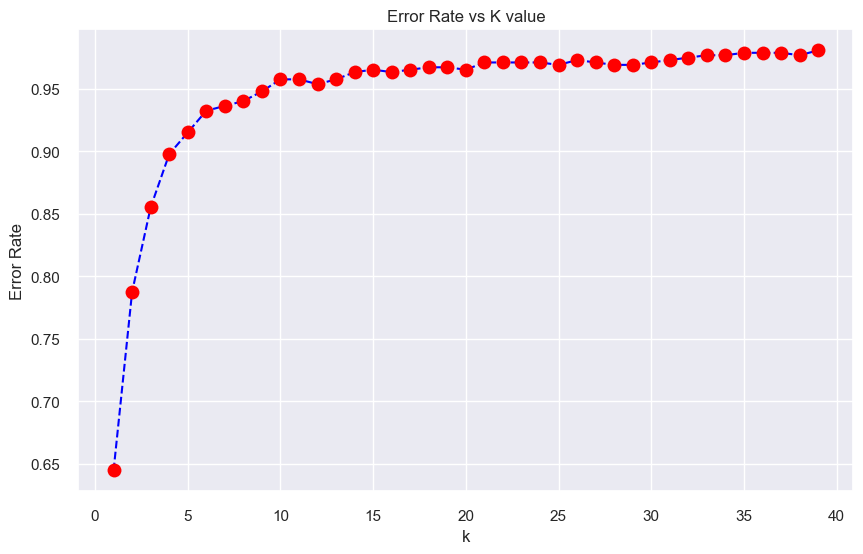

In [123]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed', marker='o',markerfacecolor='red',markersize=10)
plt.title ('Error Rate vs K value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

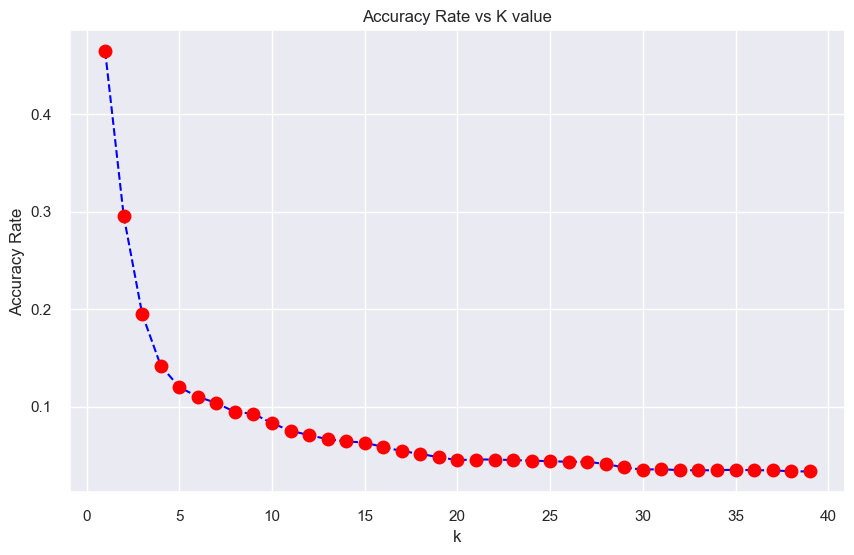

In [124]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed', marker='o',markerfacecolor='red',markersize=10)
plt.title ('Accuracy Rate vs K value')
plt.xlabel('k')
plt.ylabel('Accuracy Rate')
plt.show()

In [125]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH k=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH k=23


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


              precision    recall  f1-score   support

       80000       0.00      0.00      0.00         1
      110000       0.00      0.00      0.00         1
      135000       0.00      0.00      0.00         1
      150000       0.00      0.00      0.00         1
      170000       0.00      0.00      0.00         1
      171000       0.00      0.00      0.00         1
      175000       0.00      0.00      0.00         2
      185000       0.00      0.00      0.00         0
      190000       0.00      0.00      0.00         1
      215000       0.00      0.00      0.00         4
      225000       0.00      0.00      0.00         3
      235000       0.00      0.00      0.00         1
      240000       0.00      0.00      0.00         1
      245000       0.00      0.00      0.00         3
      250000       0.00      0.00      0.00         1
 

In [126]:
df['weights']= 1/df.shape[0]

In [127]:
df.head(1)

,year,price,Mileage,brand_rank,car_age,Car_Brand,Car_Model,Fuel_type,City,weights
0,2016,425000,9680,7,5,7,27,3,9,0.00058


### Decision Tree Classifier

In [128]:
dtc = DecisionTreeClassifier(max_depth=1)

In [129]:
x=df.iloc[:,0:7].values
y=df.iloc[:,7].values

In [130]:
dtc.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 749500.0\ngini = 0.506\nsamples = 1725\nvalue = [8, 922, 1, 788, 6]'),
 Text(0.25, 0.25, 'gini = 0.434\nsamples = 746\nvalue = [7, 218, 0, 517, 4]'),
 Text(0.75, 0.25, 'gini = 0.406\nsamples = 979\nvalue = [1, 704, 1, 271, 2]')]

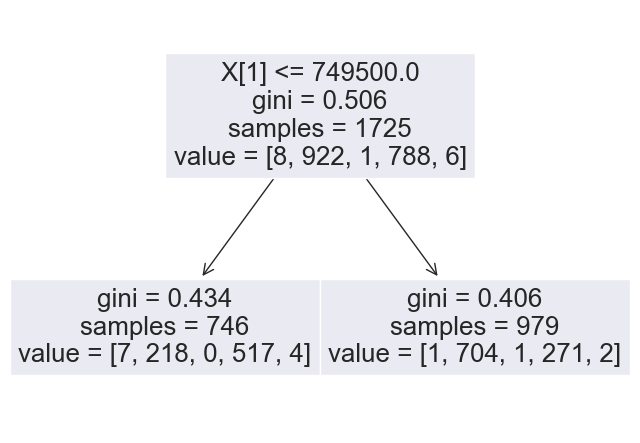

In [131]:
from sklearn.tree import plot_tree
plot_tree(dtc)

In [132]:
df['y_pred']=dtc.predict(x)

In [133]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [134]:
alpha1=calculate_model_weight(0.3)
alpha1

0.42364893019360184

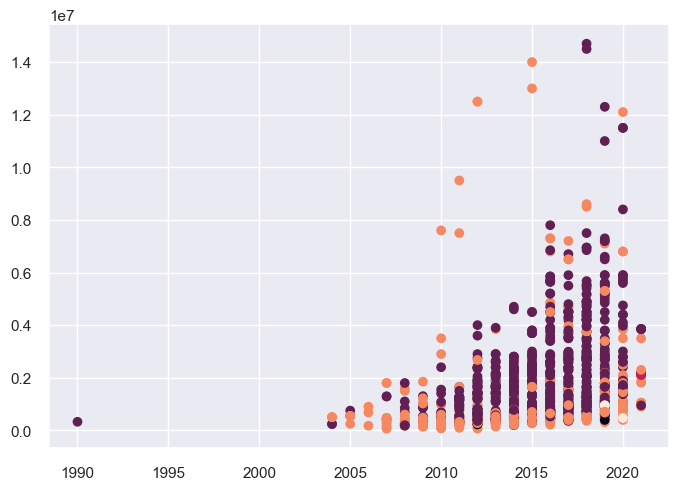

In [135]:
plt.scatter(x[:,0],x[:,1],c=y)

### AdaBoost

In [139]:
abc = AdaBoostClassifier(learning_rate=1)

In [140]:
abc.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1,
 'n_estimators': 50,
 'random_state': None}

In [141]:
np.mean(cross_val_score(abc,x,y,scoring='accuracy',cv=10))

0.6064961688398978

In [142]:
abc.fit(x,y)

AdaBoostClassifier(learning_rate=1)

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [149]:
abc.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1)

In [150]:
abc.score(x_test,y_test)

0.6428571428571429

In [151]:
abc.score(x_train,y_train)

0.6743993371996686

In [152]:
abc_pred = abc.predict(x_test)

In [153]:
print("Accuracy:",metrics.accuracy_score(y_test, abc_pred))

Accuracy: 0.6428571428571429


In [167]:
abc_train=abc.predict(x_train) 

In [168]:
import statsmodels.api as sm
x_addC = sm.add_constant(x)
result = sm.OLS(y, x_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.15559914479270964 0.15265013132865624
